# Angle Comparer Exploration

This notebook looks at angle-comparing methods from landmark outputs. \
Most of the code below is influenced by angl_comparer.py used for the Hatha Project.

### Notes
- (Enhancement) Is it worth considering **important angles** instead of all angles, based on a predetermined list for each distinct pose? Some poses may have important angles more so than other poses.
- (NN) The z-axis readouts are all over the place. 3D plots have z-axis points which are anatomically impossibsle. Throw out z-axis for NN and see if this improves our NN.
- (Bug) Downdog has differing "correct" variations, such as the knee angle.

### Poses and Landmarks
<img src="landmark_description.png" width="600"/>


## ⬇️ Imports

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image


## 📖 Load Data from CSV

In [83]:
df = pd.read_csv("pose_landmark_data.csv")
df["pose"].unique()

array(['downdog', 'tree', 'boat', 'camel', 'akarna', 'warrior', 'heron',
       'halfmoon', 'plow', 'goddess', 'dance', 'plank',
       'revolved_triangle', 'cobra'], dtype=object)

## 👀 Simple function to plot a given row in 2D/3D using matplotlib/plotly
This should be useful for varification and validation.
It appears that the y-coordinates are upside down for some reason, however this plotting **passes the sanity test**. \
The data output looks good for X and Y, however Z axis looks like its a shot in the dark. Some 3D plots are appearing to have wonky Z-axis, so it might be best to throw this out for our NN.

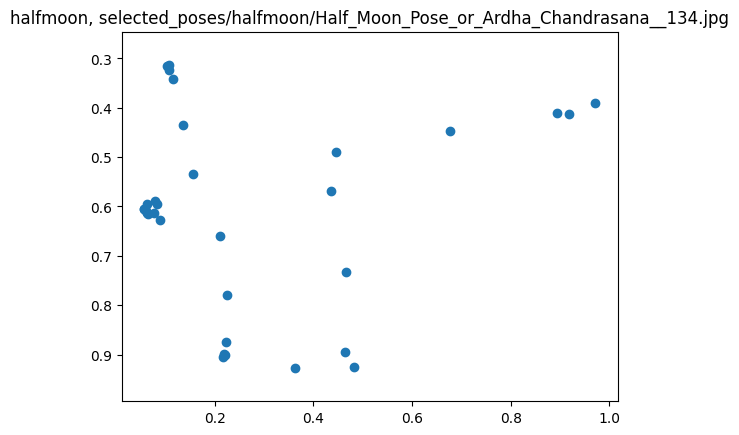

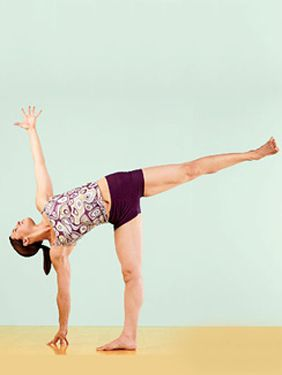

In [295]:
row = 1200
df1 = df.iloc[row]
sample_pose = df.iloc[row].pose
file_name = df.iloc[row].filename
X = df1[[col for col in df.columns if col.endswith("_x")]].values
Y = df1[[col for col in df.columns if col.endswith("_y")]].values
Z = df1[[col for col in df.columns if col.endswith("_z")]].values

coordinates = pd.DataFrame({"X": X, "Y": Y, "Z":Z})

plt.scatter(coordinates["X"], coordinates["Y"])
plt.title(f"{sample_pose}, {file_name}")
plt.xlim(0,1)
plt.ylim(1,0)
plt.axis("equal")

plt.show()

Image(filename=file_name)


# 🧪 Test angle comparer with one joint
Compare the right knee, specifically the angle made by landmarks 24, 26, and 28 (zero is the nose, so index are those numbers respectively as well)

In [270]:
pose_specific = df.query("pose == 'downdog'")
wants = ['kp24_x', 'kp24_y', 'kp26_x', 'kp26_y', 'kp28_x', 'kp28_y',]
df_RLeg = pose_specific[wants].copy()

In [271]:
angles = []

for n in range(0,df_RLeg.shape[0]):

    A = np.array((df_RLeg.iloc[n,0], df_RLeg.iloc[n,1]))
    B = np.array((df_RLeg.iloc[n,2], df_RLeg.iloc[n,3]))
    C = np.array((df_RLeg.iloc[n,4], df_RLeg.iloc[n,5]))

    # Vector BA and BC
    BA = A - B
    BC = C - B

    # Cosine of the angle between BA and BC
    cosine_angle = np.dot(BA, BC) / (np.linalg.norm(BA) * np.linalg.norm(BC))

    # Angle in radians
    angle = np.arccos(cosine_angle)

    # Convert to degrees
    angle_degrees = np.degrees(angle)

    angles.append(angle_degrees)

In [272]:
ang = pd.DataFrame(angles).set_index(pose_specific["filename"]).drop_duplicates()
ang

,0
filename,
selected_poses/downdog/00000372.jpg,162.044587
selected_poses/downdog/00000414.jpg,176.755062
selected_poses/downdog/00000158.jpg,174.238953
selected_poses/downdog/00000164.jpg,175.569832
selected_poses/downdog/00000170.jpg,179.808686
...,...
selected_poses/downdog/00000394.jpg,178.922809
selected_poses/downdog/00000419.jpg,169.296598
selected_poses/downdog/00000357.jpg,174.850757


## 📈 Distribution of angles, given target joint
For sanity checking purposes. If distribution is not unimodal, need to check if
we should split the pose into multiple poses.

<Axes: ylabel='Frequency'>

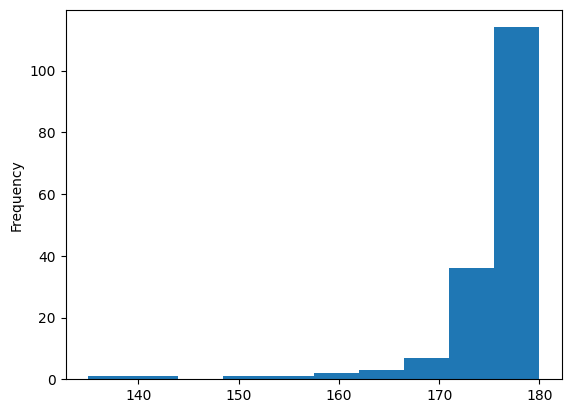

In [205]:
ang[0].plot(kind="hist")

## ✅ Combine all together, including logic for any joint.
Angle function should take in a 
The output should be a series where indices are to_check names and values are angles in degrees.

In [289]:
df_sample_row = df.iloc[1200].copy()

In [290]:
# Joints dictionary to pick specific key points from.
# Writing it this way will only allow certain key points to be measured depending on pose output.

verteces_dict = {
    'left_shoulder': ['kp13_x', 'kp13_y', 'kp11_x', 'kp11_y', 'kp23_x', 'kp23_y',],
    'right_shoulder': ['kp14_x', 'kp14_y', 'kp12_x', 'kp12_y', 'kp24_x', 'kp24_y',],
    'left_elbow': ['kp11_x', 'kp11_y', 'kp13_x', 'kp13_y', 'kp15_x', 'kp15_y',],
    'right_elbow': ['kp12_x', 'kp12_y', 'kp14_x', 'kp14_y', 'kp16_x', 'kp16_y',],
    'left_wrist': '',
    'right_wrist': '',
    'left_pinky': '',
    'right_pinky': '',
    'left_index': '',
    'left_thumb': '',
    'right_thumb': '',
    'left_hip': ['kp11_x', 'kp11_y', 'kp23_x', 'kp23_y', 'kp25_x', 'kp25_y',],
    'right_hip': ['kp12_x', 'kp12_y', 'kp24_x', 'kp24_y', 'kp26_x', 'kp26_y',],
    'left_knee': ['kp23_x', 'kp23_y', 'kp25_x', 'kp25_y', 'kp27_x', 'kp27_y',],
    'right_knee': ['kp24_x', 'kp24_y', 'kp26_x', 'kp26_y', 'kp28_x', 'kp28_y',],
    'left_ankle': '',
    'right_ankle': '',
    'left_heel': '',
    'right_heel': '',
    'left_foot_index': '',
    'right_foot_index': '',
}

all_poses = list(df["pose"].unique())

# temp variable to_check which will change based on pose, but this is a placeholder
to_check = [
    "right_shoulder",
    "left_shoulder",
    "left_elbow",
    "right_elbow",
    "left_hip",
    "right_hip",
    "left_knee",
    "right_knee",
]

# vertices required to check (all, due to temp variable above)
vertices = [verteces_dict[key] for key in to_check]

# helper method to get angle out of points a, b, and c which are np.arrays
def get_angle(a, b, c):
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    return np.degrees(np.arccos(cosine_angle))

In [293]:
angles = []
for vertex in vertices:
    a = np.array(df_sample_row[vertex][0:2])
    b = np.array(df_sample_row[vertex][2:4])
    c = np.array(df_sample_row[vertex][4:])
    angles.append(get_angle(a, b, c))
pd.Series(angles, index=to_check)

9.46 ms ± 858 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
